# 4. Spectral Norm of a Matrix

### Loading data
`load_data` function will help in loading the data from the `matrix_008.txt` file.

In [15]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

def load_dataQ4(filename):
  mat = []
  with open(filename, 'r') as file:
    row = []
    for line in file:
      row.append([str(value) for value in line.split(' ')])
    for i in row:
      mat.append([float(value) for value in i[0].split('\t')])
  return np.array(mat)

### Power Iteration
`power_iteration` function is coded as given.

In [16]:
def power_iteration(G, N_iter, reference = 0):
    u = np.random.rand(G.shape[1])  # Initialize a random vector u
    sigma = 0
    diff = []
    for _ in range(1, N_iter + 1):
        v = np.dot(G, u) / np.linalg.norm(np.dot(G, u))  # Normalize the vector
        u = np.dot(G.T, v) / np.linalg.norm(np.dot(G.T, v))
        sigma = np.dot(np.dot(G, u), v)  # Calculate sigma1 as (Gu)*v
        diff.append(abs(sigma - reference))
    return sigma, diff[1:]


### Gram Iteration
`gram_iteration` function is coded as given.

In [17]:

def gram_iteration(G, N_iter, reference):
    r = 0
    m, n = G.shape
    if n > m:
        G = G.T
    for _ in range(1, N_iter + 1):
        r = 2 * (r + np.log(np.linalg.norm(G, 'fro')))
        G = G / np.linalg.norm(G, 'fro')
        G = np.dot(G.T, G)
    sigma = np.linalg.norm(G, 'fro')**(2**(-N_iter)) * np.exp(r * (2**(-N_iter)))
    return sigma

### Spectral Norm Difference

This `spectral_norm_diff_runs` computes the spectral norm difference over multiple runs for a specified method (`power_iteration` or `gram_iteration`). It returns the differences between the computed norm and the reference norm across multiple runs and iterations.


In [18]:
def spectral_norm_diff_runs(method, iterations, reference, num_runs):
    all_diffs = []
    for _ in range(num_runs):
        diff = []
        if method == "power_iteration":
            sigma, diff = power_iteration(mat, iterations, reference)
        elif method == "gram_iteration":
            for i in range(1, iterations):
                sigma = gram_iteration(mat, i, reference)
                diff.append(abs(sigma - reference))
        all_diffs.append(diff)
    return np.array(all_diffs)


### Initialization

- Load the matrix from `matrix_008.txt` into the `mat` variable using the `load_data` function.
- Initialize other necessary variables.


In [47]:
iterations_pi = 700
iterations_gi = 10
num_runs = 100  # Number of times to run each algorithm
mat = load_dataQ4("matrix_008.txt")

### 4, 5, 6. Spectral Norm Calculation

The `spectral norm` of a matrix is computed using `power_iteration`, `gram_iteration`, and the `Numpy SVD method`. Results are compared across the methods.

### Average Run Times and Differences

The following code runs Power Iteration and Gram Iteration algorithms `num_runs` times and calculates the average execution time:

- Average Power Iteration time: `avg_pi_time`
- Average Gram Iteration time: `avg_gi_time`
- Time difference: `avg_pi_time - avg_gi_time`

Additionally, the function `spectral_norm_diff_runs` calculates the differences in spectral norm for each iteration in multiple runs for both methods. The results for the last run are stored in `diffs_pi` and `diffs_gi`.


In [20]:
pi_time, gi_time = 0, 0
sigma1_PI, sigma1_GI = 0, 0


U, S, Vh = np.linalg.svd(mat)
sigma1_NP = max(S)

for _ in range(num_runs):
    start_time = time.time()
    sigma1_PI, _ = power_iteration(mat, 500, sigma1_NP)
    pi_time += time.time() - start_time

    start_time = time.time()
    sigma1_GI = gram_iteration(mat, 10, sigma1_NP)
    gi_time += time.time() - start_time

avg_pi_time = pi_time / num_runs
avg_gi_time = gi_time / num_runs


print("Spectral Norm: ")
print("Using Power Iteration:", sigma1_PI)
print("Using Gram Iteration:", sigma1_GI)
print("Using Numpy SVD Method:", sigma1_NP)

print("\nExecution Time To Reach of 1e-10:")
print(f"Average Power Iteration time over {num_runs} runs: {avg_pi_time:.4f} seconds")
print(f"Average Gram Iteration time over {num_runs} runs: {avg_gi_time:.4f} seconds")
print(f"Time difference: {avg_pi_time - avg_gi_time:.4f} seconds")


Spectral Norm: 
Using Power Iteration: 42.078449973730386
Using Gram Iteration: 42.07844997373041
Using Numpy SVD Method: 42.0784499737304

Execution Time To Reach of 1e-10:
Average Power Iteration time over 100 runs: 0.2074 seconds
Average Gram Iteration time over 100 runs: 0.0478 seconds
Time difference: 0.1596 seconds


### 7. Convergence Plot

This plot shows the convergence of the spectral norm for Power Iteration and Gram Iteration methods, displaying the mean and standard deviation over multiple runs, on a log-log scale.



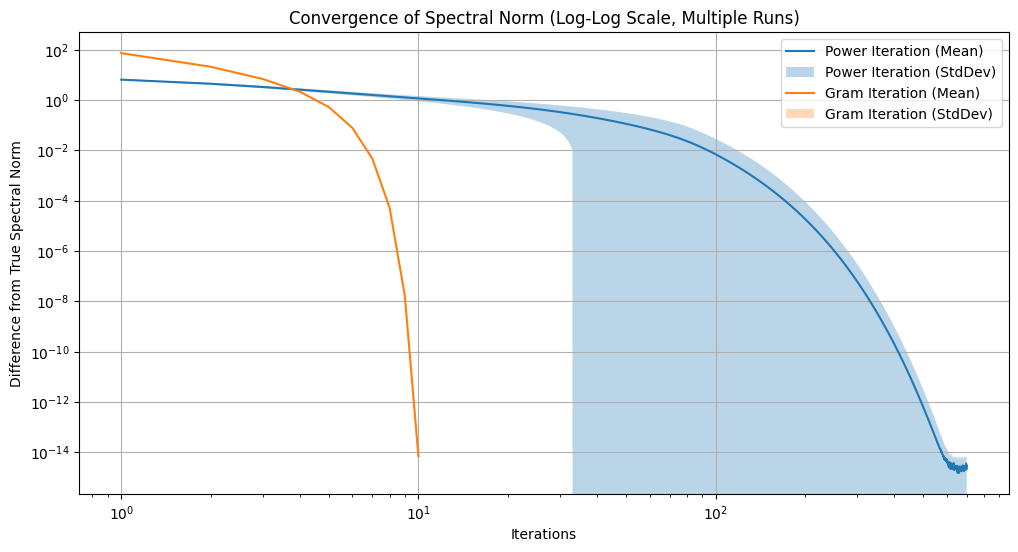

In [48]:
diffs_pi_runs = spectral_norm_diff_runs("power_iteration", iterations_pi + 1, sigma1_NP, num_runs)
diffs_gi_runs = spectral_norm_diff_runs("gram_iteration", iterations_gi + 1, sigma1_NP, num_runs)
diffs_pi = diffs_pi_runs[num_runs // 2]
diffs_gi = diffs_gi_runs[num_runs // 2]

plt.figure(figsize=(12, 6))
# Plot mean and standard deviation for Power Iteration
mean_pi = np.mean(diffs_pi_runs, axis=0)
std_pi = np.std(diffs_pi_runs, axis=0)
plt.loglog(range(1, iterations_pi + 1), mean_pi,label="Power Iteration (Mean)")
plt.fill_between(range(1, iterations_pi + 1), mean_pi - std_pi,mean_pi + std_pi, alpha=0.3, label="Power Iteration (StdDev)")

# Plot mean and standard deviation for Gram Iteration
mean_gi = np.mean(diffs_gi_runs, axis=0)
std_gi = np.std(diffs_gi_runs, axis=0)
plt.loglog(range(1, iterations_gi + 1), mean_gi, label="Gram Iteration (Mean)")
plt.fill_between(range(1, iterations_gi + 1), mean_gi - std_gi,mean_gi + std_gi, alpha=0.3, label="Gram Iteration (StdDev)")

plt.xlabel("Iterations")
plt.ylabel("Difference from True Spectral Norm")
plt.title("Convergence of Spectral Norm (Log-Log Scale, Multiple Runs)")
plt.legend()
plt.grid(True)
plt.show()


### 8. Convergence Plots

This plot shows the convergence of the spectral norm for multiple runs. The differences from the true spectral norm are plotted for both Power and Gram iterations, with logarithmic scaling on both axes. The plot includes labels for each iteration and a legend to differentiate between the two methods.


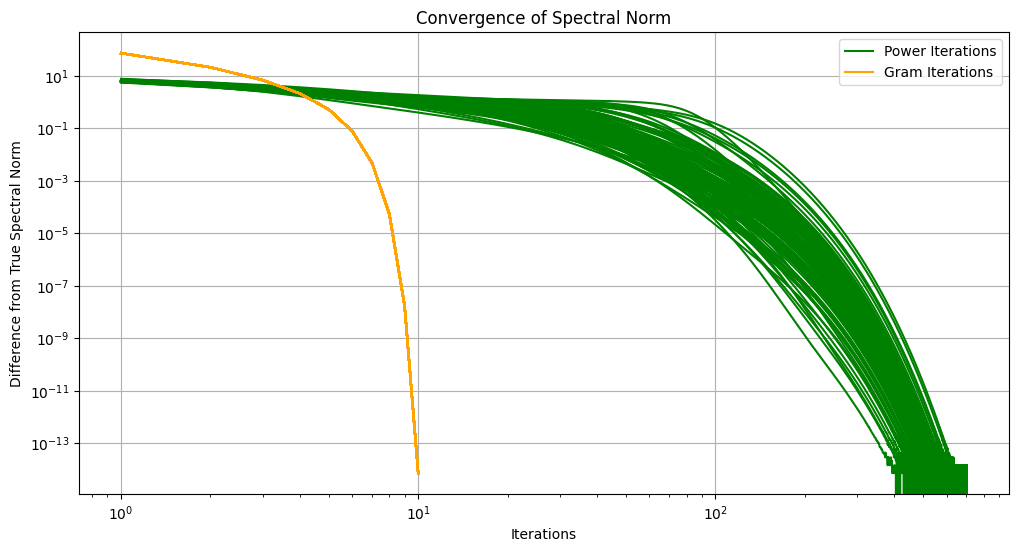

In [49]:
plt.figure(figsize=(12, 6))
for diffs_pi in diffs_pi_runs:
    plt.loglog(range(1, iterations_pi+1), diffs_pi, label="Power Iterations", color='green')
for diffs_gi in diffs_gi_runs:
    plt.loglog(range(1, iterations_gi+1), diffs_gi, label="Gram Iterations", color='orange')

plt.xlabel("Iterations")
plt.ylabel("Difference from True Spectral Norm")
plt.title("Convergence of Spectral Norm")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.grid(True)
plt.show()


### 9. Differences between Power Iteration and Gram Iteration

- **Gram iteration** converges faster, and its rate of convergence tends to increase as the algorithm progresses.
- **Power iteration** generally has a higher computational cost per iteration compared to Gram iteration.
- **Gram iteration** relies on matrix operations (Frobenius norm), which can lead to numerical instability for large matrices.
- **Gram iteration** generally shows a lower average run time compared to **Power iteration**.


### Algorithm: `find_minimum_EV(matrix)`
**Input**: Matrix $G$

1. If all elements in $G$ are zero, then:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Return 0 if G is a zero matrix`  
   &nbsp;&nbsp;&nbsp;&nbsp; Return 0  

2. Set $\sigma_1 \leftarrow \text{power\_iteration}(G, N_{\text{iter}})$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Approximate largest singular value of G`

3. Define shifted matrix:  
   $G_{\text{shifted}} \leftarrow G + (\sigma_1 + 1) \cdot I$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Shift G by adding $(\sigma_1 + 1)$ times identity matrix`

4. $G_{\text{shifted\_inverse}} \leftarrow \text{inverse}(G_{\text{shifted}})$  &nbsp;&nbsp;&nbsp;&nbsp; `# Invert shifted matrix`

5. Set $\sigma_{\text{min\_shifted\_inverse}} \leftarrow \text{power\_iteration}(G_{\text{shifted\_inverse}}, N_{\text{iter}})$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Approximate largest singular value of inverse`

6. $\sigma_{\text{min\_shifted}} \leftarrow \frac{1}{\sigma_{\text{min\_shifted\_inverse}}}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Invert to get smallest singular value of shifted G`

7. $\sigma_{\text{min}} \leftarrow \sigma_{\text{min\_shifted}} - (\sigma_1 + 1)$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Adjust for shift to obtain smallest singular value of G`

8. Return $\sigma_{\text{min}}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Return final result`


In [24]:
def find_minimum_EV(matrix):
    if (np.all(matrix == 0)):
        return 0
    sigma1_PI, _ = power_iteration(matrix, iterations_pi)
    matrix += np.eye(matrix.shape[0]) * (sigma1_PI + 1)
    matrix = np.linalg.inv(matrix)
    sigma1_PI_shifted, _ = power_iteration(matrix, iterations_pi)
    sigma1_PI_shifted = 1 / sigma1_PI_shifted
    sigma_min = sigma1_PI_shifted - (sigma1_PI + 1)
    return round(sigma_min, 2)


### 10.b To Find The Maximum Eigenvalue
Only three changes have to be made as follows:-
0. in step 3,
1. in step 6, and
2. in step 7

**Pseudocode will look like**
### Algorithm: `find_maximum_EV(matrix)`
**Input**: Matrix $G$

1. If all elements in $G$ are zero, then:  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Return 0 if G is a zero matrix`  
   &nbsp;&nbsp;&nbsp;&nbsp; Return 0  

2. Set $\sigma_1 \leftarrow \text{power\_iteration}(G, N_{\text{iter}})$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Approximate largest singular value of G`

3. Define shifted matrix:  
   $G_{\text{shifted}} \leftarrow G - (\sigma_1 + 1) \cdot I$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Shift G by subtracting $(\sigma_1 + 1)$ times identity matrix`

4. $G_{\text{shifted\_inverse}} \leftarrow \text{inverse}(G_{\text{shifted}})$  &nbsp;&nbsp;&nbsp;&nbsp; `# Invert shifted matrix`

5. Set $\sigma_{\text{max\_shifted\_inverse}} \leftarrow \text{power\_iteration}(G_{\text{shifted\_inverse}}, N_{\text{iter}})$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Approximate largest singular value of inverse`

6. $\sigma_{\text{max\_shifted}} \leftarrow \frac{-1}{\sigma_{\text{max\_shifted\_inverse}}}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Invert to get largest singular value of shifted G and make it negative`

7. $\sigma_{\text{max}} \leftarrow \sigma_{\text{max\_shifted}} + (\sigma_1 + 1)$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Adjust for shift to obtain largest singular value of G`

8. Return $\sigma_{\text{max}}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `# Return final result`



### Testing:
1. **Matrix Creation**: A random $10 \times 10$ matrix is created and symmetrized.
2. **Testing the Function**: We use the `find_minimum_EV` function to find the smallest eigenvalue of the matrix.

This code will create a symmetric matrix, apply the power iteration method, and print the smallest eigenvalue.


In [34]:
max_EV = 10001
min_EV = -10000
size = 10
diag = random.sample(range(min_EV, max_EV), size) # predetermined random eigenvalues
D = np.diag(diag) # diagonal elements
Q, _ = np.linalg.qr(np.random.rand(size, size))
matrix = Q @ D @ Q.T # symmetric matrix
print("Eigenvalues", (sorted(diag)))
print("minimum eigenvalue by construction:", min(diag))
print("minimum eigenvalue calculated:" ,find_minimum_EV(matrix))

Eigenvalues [-9976, -7565, -7387, -4628, 1129, 1978, 2300, 3399, 3658, 7454]
minimum eigenvalue by construction: -9976
minimum eigenvalue calculated: -9976.0
